# **Abstract of the Exploratory Data Analysis (EDA)**

The exploratory data analysis (EDA) conducted on the fitness dataset provided insights into the characteristics and quality of the data before further modeling or use in a personalized fitness recommender system. The EDA process involved the following key steps:

***Initial Data Overview:*** The dataset was examined to understand its structure, types of variables, and general distribution. Summary statistics were provided to outline basic metrics such as mean, median, and distribution of numerical and categorical features.

***Missing Values Analysis:*** A heatmap was used to visualize missing data, and columns with more than 50% missing values were dropped to enhance data quality. Missing numerical data were filled using the median, while missing categorical data were filled using the mode, ensuring data completeness.

***Data Encoding and Transformation:*** Categorical variables were label-encoded to facilitate numerical analysis, while numerical features were standardized using a scaler to achieve uniformity and make them suitable for machine learning models. This step ensured that variables were treated appropriately in downstream modeling.

 ***Data Visualization:*** Several visualizations were included to understand data distribution and relationships:
        Histogram of age distribution to observe the spread and central tendency of participants' ages.
        Countplot for gender distribution to show the representation of encoded gender categories.
        Correlation Matrix to highlight relationships among numerical variables, indicating potential multicollinearity or important correlations.
        Boxplot showing the distribution of weekly fitness commitment across different age groups and activity levels, providing insights into how different segments engage in fitness activities.

  ***Outlier and Duplicate Handling:*** The dataset was reviewed for duplicate entries, which were removed to maintain data integrity. Outliers were visualized to determine their impact on the analysis and modeling.

  ***Final Output:*** The cleaned and transformed dataset was prepared for further analysis or modeling, with all preprocessing steps documented. The cleaned dataset was saved as a CSV file, making it ready for use in developing a personalized fitness recommender system.

The EDA provided a comprehensive understanding of the data's structure, potential issues, and relationships, laying a solid foundation for building privacy-preserving and effective personalized recommendations for Indian college students.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [3]:
# Load the dataset
df = pd.read_csv('/content/fitness_data_simulated.csv')

# Step 1: Initial Overview of Data
print("### Initial Dataset Overview ###")
print(df.head())
print("\n### Basic Information ###")
print(df.info())
print("\n### Summary Statistics ###")
print(df.describe(include='all'))

### Initial Dataset Overview ###
   Age  Gender Year_of_Study Health_Conditions    Primary_Fitness_Goals  \
0   22    Male      3rd Year               NaN              Weight Loss   
1   23  Female      4th Year               NaN  Flexibility Improvement   
2   19    Male      4th Year         Knee Pain              Muscle Gain   
3   21  Female      1st Year            Asthma              Muscle Gain   
4   19    Male      3rd Year         Back Pain            Stress Relief   

  Weekly_Fitness_Commitment Preferred_Workouts Current_Activity_Level  \
0                 1-2 times              Other                   High   
1                 1-2 times             Sports              Very High   
2                 5-6 times      Home workouts                    Low   
3                 5-6 times      Home workouts                    Low   
4                 1-2 times             Sports                   High   

  Preferred_Workout_Time Workout_Session_Duration Dietary_Preferences  \
0   

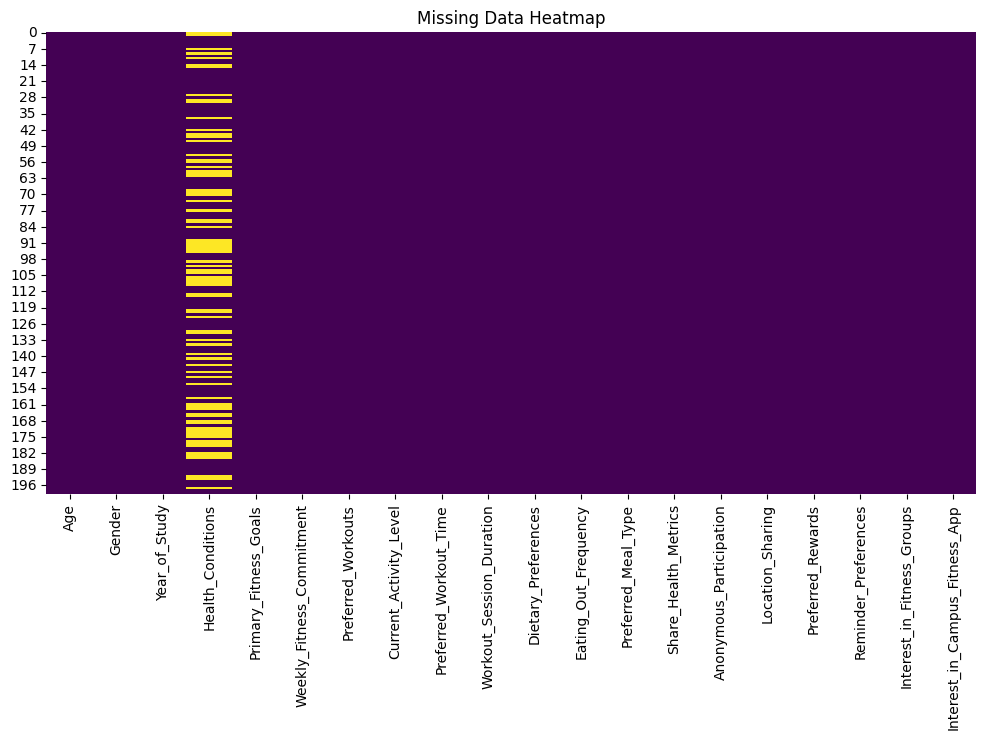

<ipython-input-4-0b21a1d5438d>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-4-0b21a1d5438d>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [4]:
# Step 2: Handling Missing Values
# Visualize missing data
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

# Drop columns with more than 50% missing data
df = df.loc[:, df.isnull().mean() < 0.5]

# Fill missing numerical data with the median
for col in df.select_dtypes(include=['number']).columns:
    df[col].fillna(df[col].median(), inplace=True)

# Fill missing categorical data with the mode
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [5]:
# Step 3: Encoding Categorical Variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [6]:
# Step 4: Normalization of Numerical Features
scaler = StandardScaler()
num_cols = df.select_dtypes(include=['number']).columns
df[num_cols] = scaler.fit_transform(df[num_cols])

In [7]:
# Step 5: Remove Duplicates
initial_row_count = df.shape[0]
df.drop_duplicates(inplace=True)
print(f"Removed {initial_row_count - df.shape[0]} duplicate rows.")

Removed 0 duplicate rows.


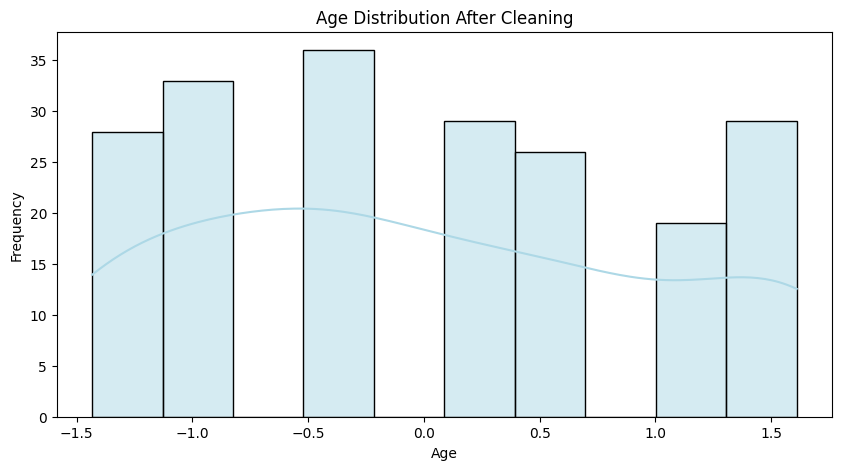

In [9]:
# Step 6: Visualizations
# Distribution of age after cleaning
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=10, kde=True, color='lightblue')
plt.title('Age Distribution After Cleaning')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<ipython-input-10-a8282bf0eb79>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='cool')


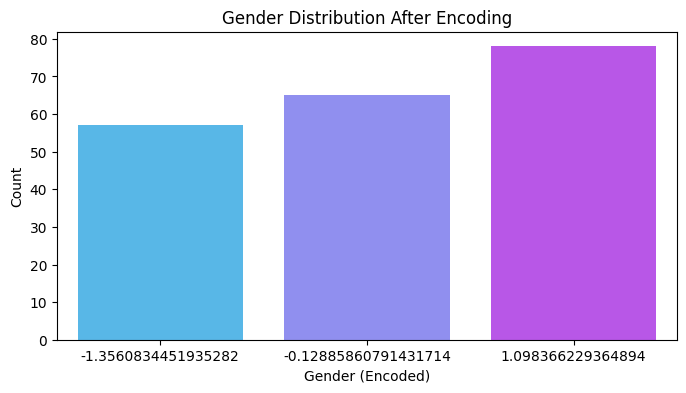

In [10]:
# Countplot for Gender
plt.figure(figsize=(8, 4))
sns.countplot(x='Gender', data=df, palette='cool')
plt.title('Gender Distribution After Encoding')
plt.xlabel('Gender (Encoded)')
plt.ylabel('Count')
plt.show()

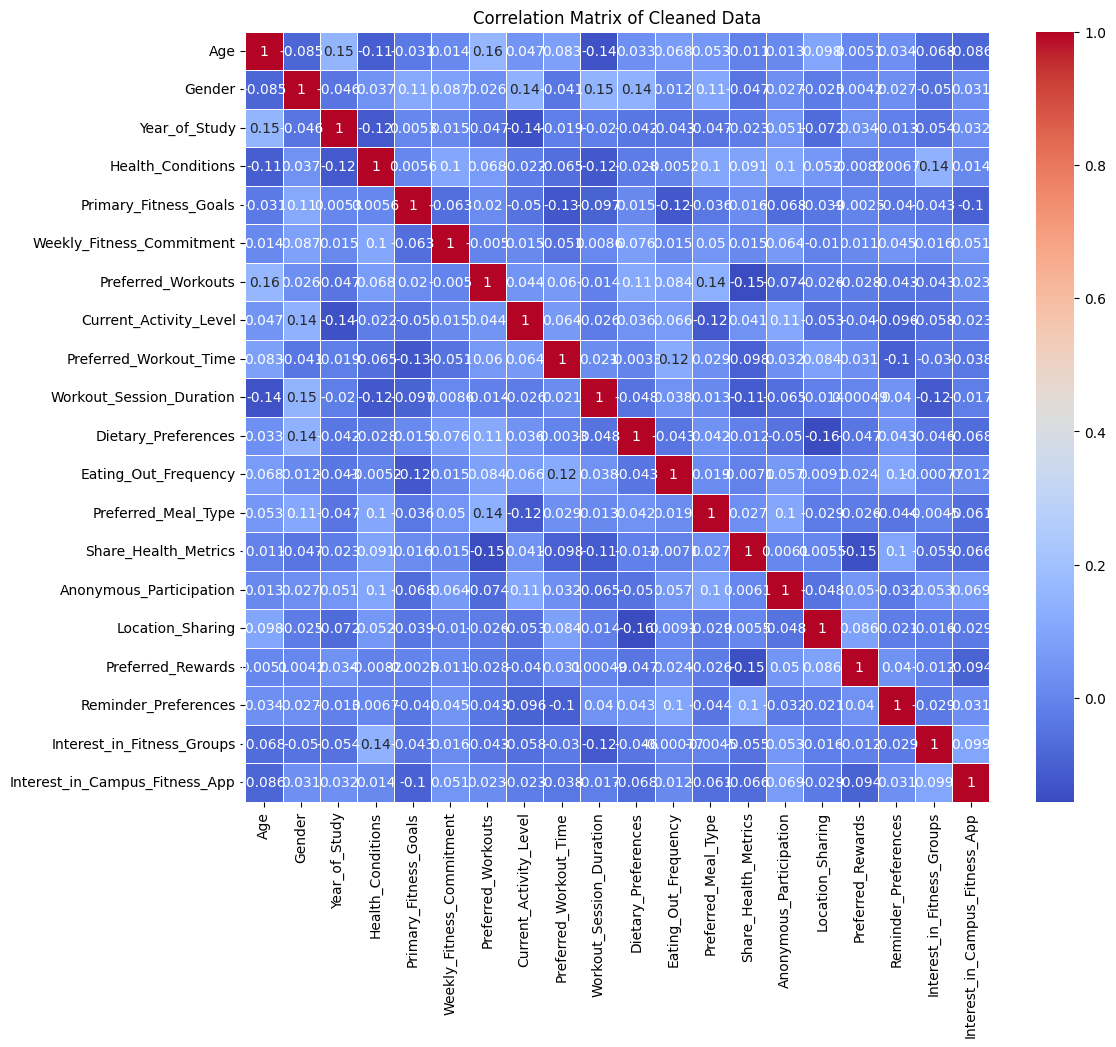

In [11]:
# Visualize correlations
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Cleaned Data')
plt.show()


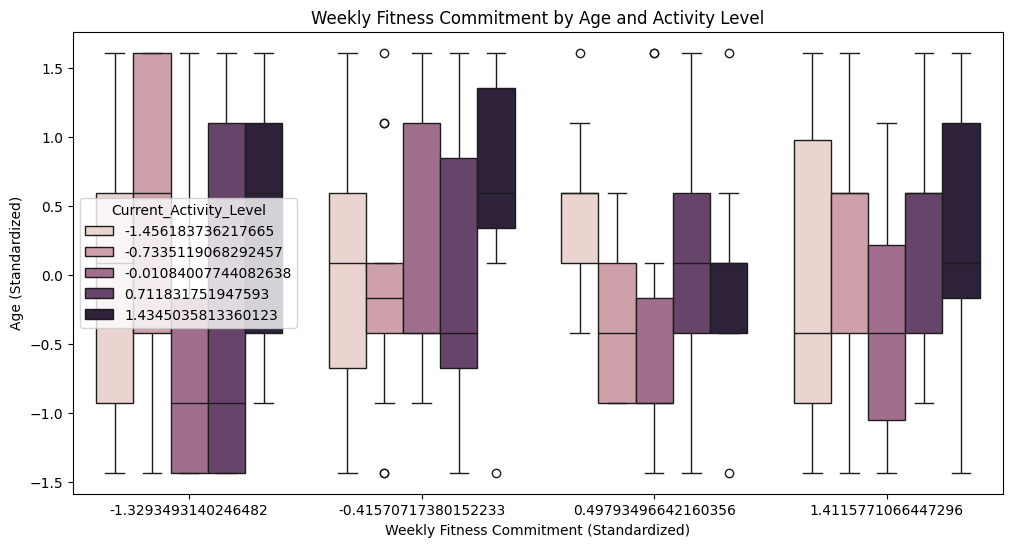

In [12]:
# Boxplot for Weekly Fitness Commitment by Activity Level
plt.figure(figsize=(12, 6))
sns.boxplot(x='Weekly_Fitness_Commitment', y='Age', hue='Current_Activity_Level', data=df)
plt.title('Weekly Fitness Commitment by Age and Activity Level')
plt.xlabel('Weekly Fitness Commitment (Standardized)')
plt.ylabel('Age (Standardized)')
plt.show()


In [15]:
# Save the cleaned dataset to a CSV file in Colab
cleaned_file_path = 'cleaned_fitness_data.csv'
df.to_csv(cleaned_file_path, index=False)

# Provide a download link for the cleaned dataset
from google.colab import files
files.download(cleaned_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>